# Warmup

1. Copy the code below into a jupyter notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

2. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.

In [6]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [18]:
df1[df1.time == 'one'].x.mean()

5.726669425801799

In [19]:
df1[df1.time == 'two'].x.mean()

7.296448106590939

In [51]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [52]:
df1.groupby(['group', 'time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [53]:
df1.groupby(['group', 'time']).size()

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

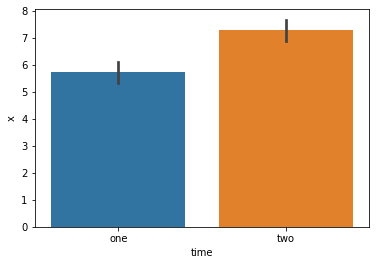

In [17]:
sns.barplot(x='time', y='x', data=df1)

In [55]:
null = 'group one mean = group two mean'
alt = 'group one mean != group two mean'

alpha = .05

time_one = df1[df1.time == 'one'].x
time_two = df1[df1.time == 'two'].x
t, p = stats.ttest_ind(time_one, time_two)
t, p

(-5.443902721870272, 1.5320971681720527e-07)

In [56]:
p > alpha, t < 0

(False, True)

In [60]:
if p > alpha:
    print("We fail to reject $H_{0}$ that", null)
elif t < 0:
    print("We fail to reject $H_{0}$ that", null)
else:
    print("We reject $H_{0}$ that", null)

We fail to reject $H_{0}$ that group one mean = group two mean


3. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

In [24]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


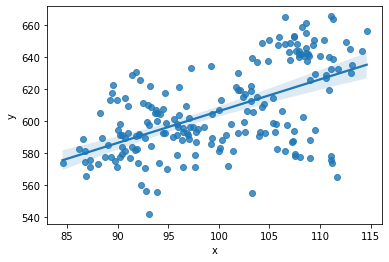

In [27]:
sns.regplot(x='x', y='y', data=df2)

In [ ]:
#looks like a decent linear relationship

In [62]:
x = df2.x
y = df2.y

r, p = stats.pearsonr(x, y)
r, p

(0.5693902765694359, 1.3960403186191819e-18)

4. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon should you go to?

In [29]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [30]:
df3.surgeon.value_counts()

B    520
A    480
Name: surgeon, dtype: int64

In [33]:
df3[df3.surgeon == 'A'].mean()

success    0.877083
dtype: float64

In [34]:
df3[df3.surgeon == 'B'].mean()

success    0.723077
dtype: float64

In [47]:
#surgeon a
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

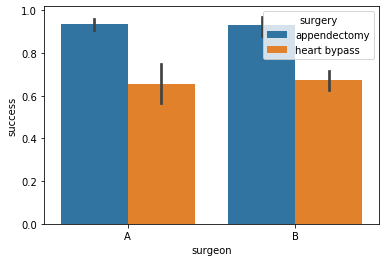

In [50]:
sns.barplot(x='surgeon', y='success', data=df3, hue='surgery')

5. For `df1` and `df2`, what happens to the relationships if you take into account the `group` feature?

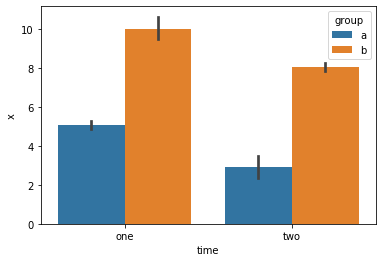

In [37]:
sns.barplot(x='time', y='x', data=df1, hue='group')

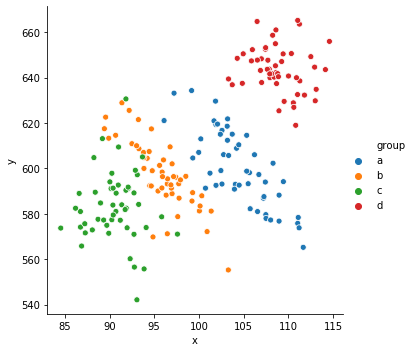

In [36]:
sns.relplot(x='x', y='y', data=df2, hue='group')